## Handwritten Image Classification 



In [24]:
# imports for the day
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray

from PIL import Image

import plotly as py

### Load in and Explore the Data

In [2]:
# load the data
sk_data = load_digits()

In [3]:
sk_data.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
#Cool slider to browse all of the images.
from ipywidgets import interact
def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))

In [6]:
browse_images(sk_data.images, sk_data.target, sk_data.target_names)

interactive(children=(IntSlider(value=898, description='i', max=1796), Output()), _dom_classes=('widget-intera…

In [7]:
# Split up the data in features and labels
feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names

n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

In [9]:
# Look at the data
print('The number of samples are: ', n_samples)
print('The number of features are: ', n_features)
print('The number of classes are: ', n_classes)
print('The shape of the image dimensions are: ',h, ' by ', w)

The number of samples are:  1797
The number of features are:  64
The number of classes are:  10
The shape of the image dimensions are:  8  by  8


### Distrubution of the data


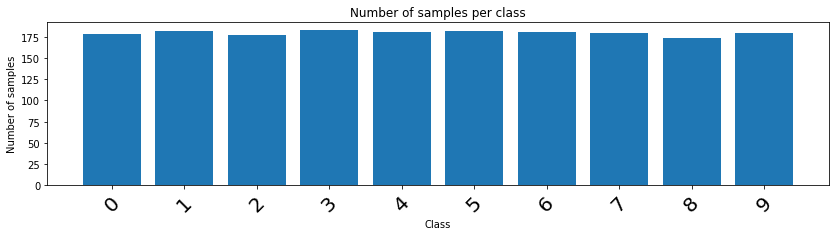

In [10]:
plt.figure(figsize=(14, 3))

y_unique = np.unique(class_labels)
counts = [(class_labels == i).sum() for i in y_unique]

plt.xticks(y_unique,  categories[y_unique])
locs, labels = plt.xticks()
plt.title('Number of samples per class')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.setp(labels, rotation=45, size=20)
_ = plt.bar(y_unique, counts)

## Split into train and test data sets

In [11]:
# Split into a training set and a testing set
train_vectors,test_vectors,train_labels,test_labels = train_test_split(feature_vectors,class_labels,train_size=.75)

print('The number of training samples are: ', train_vectors.shape[0])
print('The number of testing samples are: ', test_vectors.shape[0])

The number of training samples are:  1347
The number of testing samples are:  450


## Training the classifier 

In [21]:
# Train a SVM classification model

# count time taken to train
start = time.time()

# temporary variables 
tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
# make a classifier by searching over a classifier and the parameter grid
# this is an exgustive search over all possible combinations of parameters
# the best combination is found by cross-validation
clf = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001, kernel='linear')
Runtime 6.9993181228637695


## Result of classification 

In [22]:
# Quantitative evaluation of the model quality on the test set

#make some temporary variables so you can change this easily
predict_vectors = test_vectors
true_labels = test_labels

print("Predicting names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(n_classes)))
svc_accuracy = clf.score(predict_vectors, true_labels)

Predicting names on the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.96      0.96      0.96        50
           2       1.00      1.00      1.00        42
           3       1.00      0.93      0.97        45
           4       0.98      0.98      0.98        53
           5       0.90      0.98      0.94        46
           6       1.00      1.00      1.00        38
           7       0.97      1.00      0.99        39
           8       0.96      0.96      0.96        49
           9       0.97      0.92      0.94        37

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

[[51  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  1  0  0  0  1  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  3  0  0  0  0]
 [ 0  0  0  0 52  0  0  1  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0

In [19]:
# Train a KNN classification model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_vectors, train_labels)

# KNN stats
print("Classification report for KNN classifier:")
print(classification_report(test_labels, knn.predict(test_vectors)))
knn_accuracy = knn.score(test_vectors, test_labels)


Classification report for KNN classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.96      1.00      0.98        50
           2       1.00      0.98      0.99        42
           3       0.98      0.98      0.98        45
           4       1.00      0.98      0.99        53
           5       0.98      0.98      0.98        46
           6       1.00      1.00      1.00        38
           7       0.97      1.00      0.99        39
           8       1.00      0.94      0.97        49
           9       0.95      1.00      0.97        37

    accuracy                           0.98       450
   macro avg       0.98      0.99      0.98       450
weighted avg       0.98      0.98      0.98       450



In [18]:
# Use Naive Bayes to classify the data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_vectors, train_labels)

# Naive Bayes stats
print("Classification report for Naive Bayes classifier:")
print(classification_report(test_labels, gnb.predict(test_vectors)))
naive_bayes_accuracy = gnb.score(test_vectors, test_labels)


Classification report for Naive Bayes classifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.89      0.78      0.83        50
           2       1.00      0.62      0.76        42
           3       0.87      0.73      0.80        45
           4       1.00      0.83      0.91        53
           5       0.93      0.91      0.92        46
           6       0.97      1.00      0.99        38
           7       0.67      1.00      0.80        39
           8       0.56      0.94      0.70        49
           9       0.92      0.59      0.72        37

    accuracy                           0.84       450
   macro avg       0.88      0.84      0.84       450
weighted avg       0.88      0.84      0.85       450



In [14]:
# Use Bayes Net to classify the data
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(train_vectors, train_labels)

# Bayes Net stats
print("Classification report for Bayes Net classifier:")
print(classification_report(test_labels, bnb.predict(test_vectors)))
bnb_accuracy = bnb.score(test_vectors, test_labels)

Classification report for Bayes Net classifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.68      0.46      0.55        50
           2       0.82      0.88      0.85        42
           3       0.93      0.87      0.90        45
           4       0.93      0.94      0.93        53
           5       0.90      0.83      0.86        46
           6       0.92      0.95      0.94        38
           7       0.84      0.97      0.90        39
           8       0.68      0.80      0.74        49
           9       0.69      0.78      0.73        37

    accuracy                           0.84       450
   macro avg       0.84      0.85      0.84       450
weighted avg       0.84      0.84      0.84       450



In [16]:
# Use Decision Tree to classify the data
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_vectors, train_labels)

# Decision Tree stats
print("Classification report for Decision Tree classifier:")
print(classification_report(test_labels, dtc.predict(test_vectors)))
dtc_accuracy = dtc.score(test_vectors, test_labels)

Classification report for Decision Tree classifier:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        51
           1       0.82      0.82      0.82        50
           2       0.92      0.83      0.88        42
           3       0.83      0.87      0.85        45
           4       0.85      0.87      0.86        53
           5       0.95      0.89      0.92        46
           6       0.92      0.89      0.91        38
           7       0.72      0.92      0.81        39
           8       0.83      0.69      0.76        49
           9       0.81      0.81      0.81        37

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.86      0.85      0.85       450



In [17]:
# Use J48 to classify the data
from sklearn.tree import DecisionTreeClassifier
j48 = DecisionTreeClassifier()
j48.fit(train_vectors, train_labels)

# J48 stats
print("Classification report for J48 classifier:")
print(classification_report(test_labels, j48.predict(test_vectors)))
j48_accuracy = j48.score(test_vectors, test_labels)

Classification report for J48 classifier:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        51
           1       0.82      0.80      0.81        50
           2       0.89      0.81      0.85        42
           3       0.90      0.84      0.87        45
           4       0.86      0.91      0.88        53
           5       0.89      0.89      0.89        46
           6       0.89      0.89      0.89        38
           7       0.74      0.90      0.81        39
           8       0.83      0.71      0.77        49
           9       0.79      0.81      0.80        37

    accuracy                           0.86       450
   macro avg       0.86      0.85      0.85       450
weighted avg       0.86      0.86      0.85       450



In [23]:
# Use Random Forest to classify the data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_vectors, train_labels)

# Random Forest stats
print("Classification report for Random Forest classifier:")
print(classification_report(test_labels, rfc.predict(test_vectors)))
rfc_accuracy = rfc.score(test_vectors, test_labels)

Classification report for Random Forest classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        42
           3       1.00      0.91      0.95        45
           4       1.00      0.98      0.99        53
           5       0.94      0.98      0.96        46
           6       1.00      0.97      0.99        38
           7       0.95      1.00      0.97        39
           8       0.94      0.96      0.95        49
           9       1.00      0.95      0.97        37

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.98       450
weighted avg       0.98      0.98      0.98       450



## Graph results of each classifier 

In [30]:
# Plotly bar chat of accuracy
import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure(data=[
    go.Bar(name='SVC', x=['SVC'], y=[svc_accuracy]),
    go.Bar(name='KNN', x=['KNN'], y=[knn_accuracy]),
    go.Bar(name='Naive Bayes', x=['Naive Bayes'], y=[naive_bayes_accuracy]),
    go.Bar(name='Bayes Net', x=['Bayes Net'], y=[bnb_accuracy]),
    go.Bar(name='Decision Tree', x=['Decision Tree'], y=[dtc_accuracy]),
    go.Bar(name='J48', x=['J48'], y=[j48_accuracy]),
    go.Bar(name='Random Forest', x=['Random Forest'], y=[rfc_accuracy])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()




## Testing My Hand written numbers  (NOT DONE NEEDS WORK)

### CLF 

In [ ]:
# Predict the value of the test vectors
predicted = clf.predict(test_vectors)


# test a new image

# load image from folder
test_image_7 = io.imread('Screen Shot 2022-09-22 at 10.12.00 PM.png')
test_image_5 = io.imread('Screen Shot 2022-09-26 at 5.10.56 PM.png')
test_image_8 = io.imread('Screen Shot 2022-09-26 at 5.29.16 PM.png')

# convert to grayscale
#test_image = rgb2gray(test_image)
# resize to 8x8
test_image = resize(test_image_7, (8, 8))
test_image3 = resize(test_image_5, (8, 8))
test_image4 = resize(test_image_8, (8, 8))

# convert to vector
#test_image = test_image.reshape(1, -1)
print(test_image.shape)



plt.imshow(test_image4)
plt.show()
# Make shape from 8x8x4 to 8x8
test_image4 = test_image4[:,:,0]

# predict test image
predicted = clf.predict(test_image4.reshape(1, -1))
print(predicted)
# show the image
plt.imshow(test_image4, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[predicted[0]])
plt.axis('off')

predicted


# Using KNN

In [ ]:
# test knn model 
test_image_8 = io.imread('Screen Shot 2022-09-26 at 5.29.16 PM.png')
test_image8 = resize(test_image_8, (8, 8))
# Make shape from 8x8x4 to 8x8
test_image8 = test_image8[:,:,0]
print(test_image8.reshape(1, -1))

knn_predicted = knn.predict(test_image8.reshape(1, -1))
# show the image
plt.imshow(test_image8, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predicted[0]])
plt.axis('off')



test_image_5 = io.imread('Screen Shot 2022-09-26 at 5.10.56 PM.png')
test_image5 = resize(test_image_5, (8, 8))
# Make shape from 8x8x4 to 8x8
test_image5 = test_image5[:,:,0]
knn_predicted2 = knn.predict(test_image5.reshape(1, -1))
# show the image
plt.imshow(test_image5, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predicted2[0]])
plt.axis('off')
